In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree, write_volume
from cryofib.napari_utils import napari_add_group

## View n5 datasets

In [2]:
postprocess_path = Path("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5")
f_em = z5py.File(postprocess_path, "r")

In [3]:
print_key_tree(f_em)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
segmentation
input
input/raw
input/raw_norm


## Read volumes

In [5]:
roi = np.s_[:, 400:600, :]
em = read_volume(f_em, "input/raw", roi)


<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume input/raw from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
Read volume with shape (1350, 200, 1647), data type uint8


In [6]:
f_em = "/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_thin_boundaries_predictions.n5"

In [7]:
boundaries = read_volume(f_em, "dilated_boundary_predictions/dice_16x512x512/boundaries", roi)
fg = read_volume(f_em, "dilated_boundary_predictions/dice_16x512x512/fg", roi)
extra = read_volume(f_em, "dilated_boundary_predictions/dice_16x512x512/extra", roi)

<class 'str'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume dilated_boundary_predictions/dice_16x512x512/boundaries from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_thin_boundaries_predictions.n5
Read volume with shape (1350, 200, 1647), data type float32
<class 'str'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume dilated_boundary_predictions/dice_16x512x512/fg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_thin_boundaries_predictions.n5
Read volume with shape (1350, 200, 1647), data type float32
<class 'str'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume dilated_boundary_predictions/dice_16x512x512/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_thin_boundaries_predictions.n5
Read volume with shape (1350, 200, 1647), data type float32


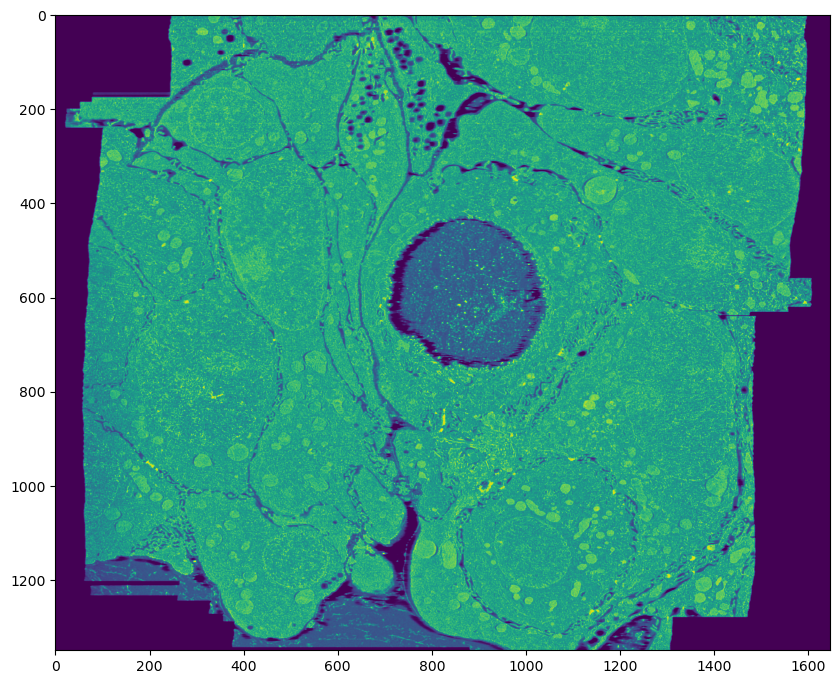

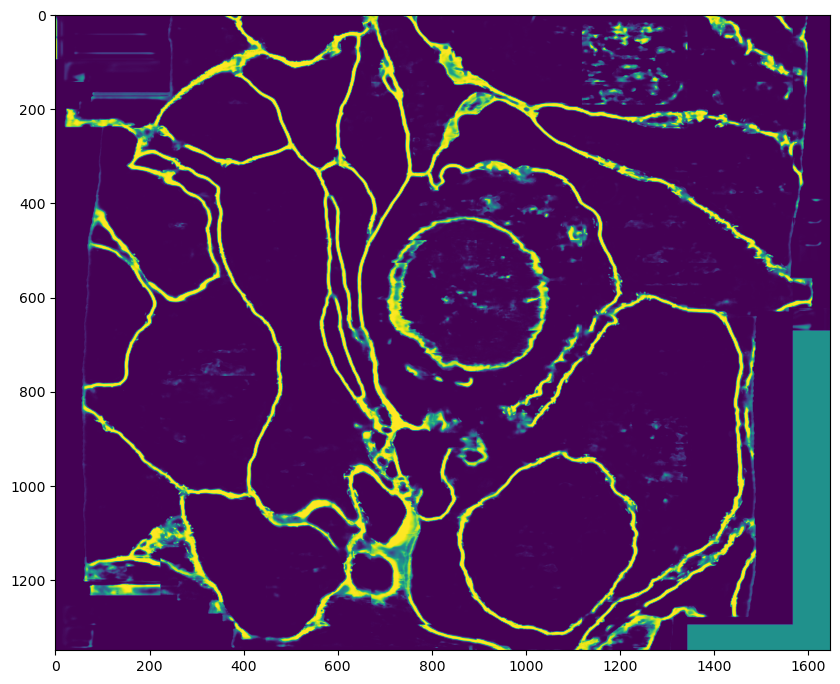

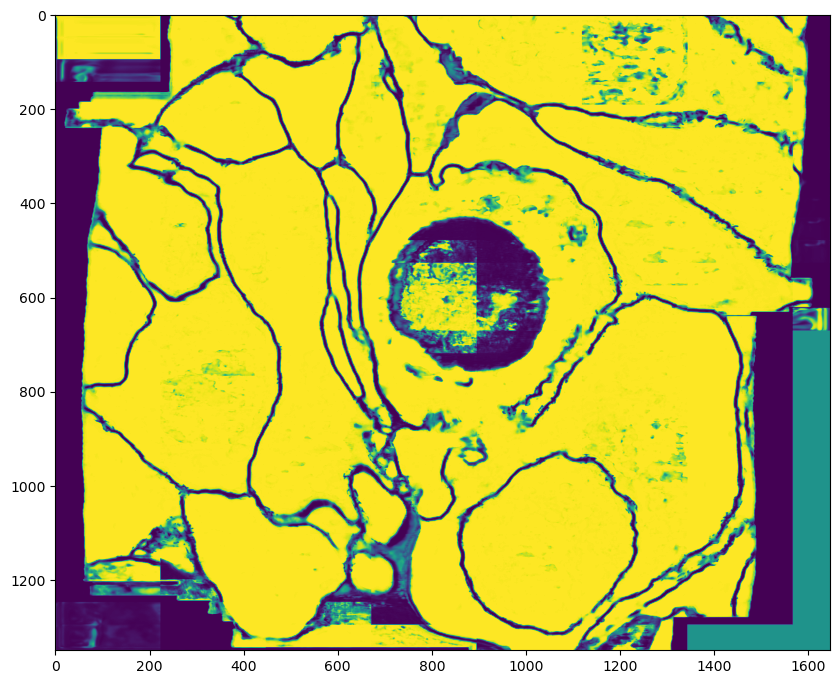

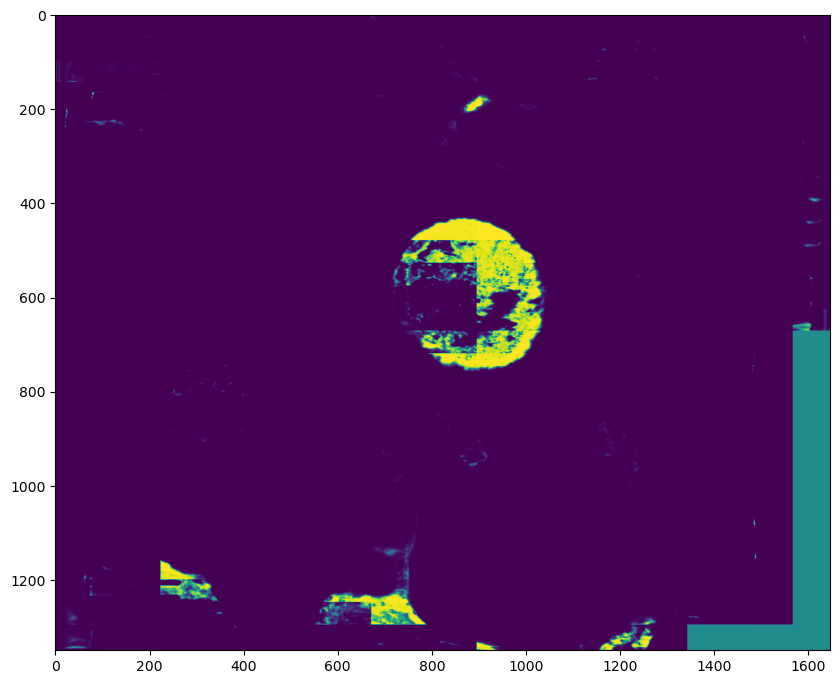

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(em[:, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(boundaries[:, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(fg[:, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(extra[:, 0, :])

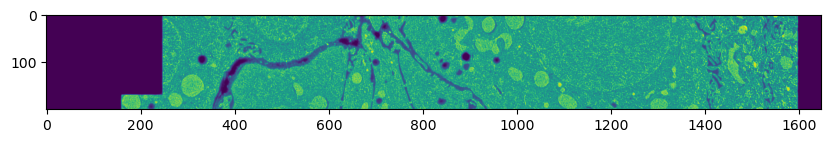

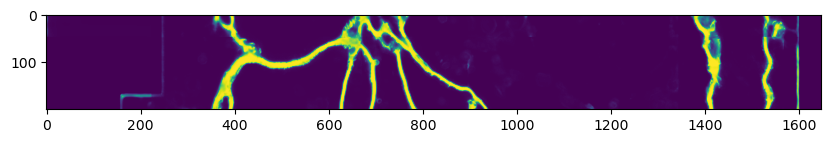

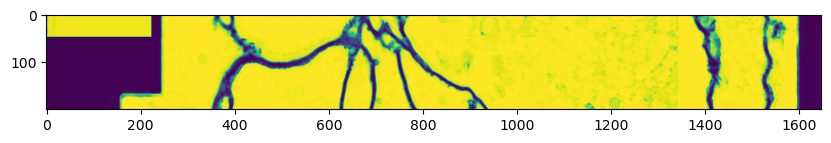

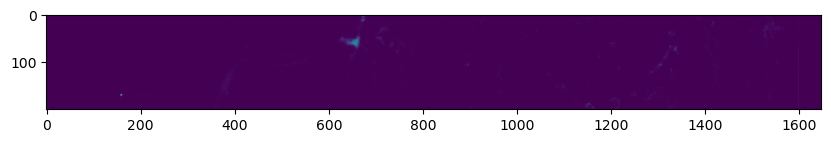

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(em[0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(boundaries[0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(fg[0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(extra[0, :, :])

## Open raw in napari

In [14]:
v = napari.Viewer()

In [15]:
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7f08c4367580>

In [16]:
for ch in range(segmentation.shape[0]):
    v.add_labels(segmentation[ch, ...], name=f"segmentation ch {ch}")

In [9]:
# napari_add_group(f_em, "channels", v)